# Digit Classification using Convolutional Neural Networks

![Convolutional Neural Networks](img/cnn.png "Convnet")

## Implementing a CNN

#### Loading Required Packages and Data

In [1]:
# Import required Packages
from keras.datasets import cifar10
from keras.models import Sequential 
from keras.layers.core import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

#Loading Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#Dataset Shapes
print("x_train Shape :", x_train.shape)
print("y_train Shape :", y_train.shape)
print("x_test Shape :", x_test.shape)
print("y_test Shape :", y_test.shape)

Using TensorFlow backend.


170500096/170498071 [==============================] - 66s 0us/step
x_train Shape : (50000, 32, 32, 3)
y_train Shape : (50000, 1)
x_test Shape : (10000, 32, 32, 3)
y_test Shape : (10000, 1)


#### Preprocessing in Channel Last Format for Tensorflow

In [2]:
y_train[10]


array([4], dtype=uint8)

In [3]:
# Reshaping Data in "Channel Last" format for consumption of Tensorflow backend
x_train = x_train.reshape(x_train.shape[0],32,32,3)
x_test = x_test.reshape(x_test.shape[0],32,32,3)
# converting to floating point and normalizing pixel values in range [0,1]
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255
# Reshaping Labels in One-hot encoding for Multi-class Classification
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# Seeing updated Shapes
print("x_train Shape :", x_train.shape)
print("y_train Shape :", y_train.shape)
print("x_test Shape :", x_test.shape)
print("y_test Shape :", y_test.shape)

x_train Shape : (50000, 32, 32, 3)
y_train Shape : (50000, 10)
x_test Shape : (10000, 32, 32, 3)
y_test Shape : (10000, 10)


### Dataset Visualizations

In [5]:
y_train[11]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


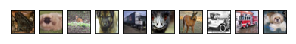

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
n = 40  # how many digits we will display
plt.figure(figsize=(20, 8))
for i in range(30,40):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32,32,3))
    print(y_test[i])
    
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Setting up Parameters

In [7]:
img_rows, img_cols, channels = 32, 32, 3
filters = [6,32,80,120] # Filter no.s depict the groups of neurons sharing weights and Biases
classes=10

### Building ConvNet (CNN) Model

![Convolutional Neural Networks](img/cnn.png "Convnet")

In [8]:
# Creating Model
model=Sequential() #Sequential is a container to store layers
model.add(Conv2D(filters[0],(3,3),padding='same',\
                 activation='relu',input_shape=(img_rows,img_cols, channels)))
model.add(MaxPooling2D(pool_size=(2,2))) #For reducing image size
# (dim+pad-kernel)/2   (28 +3 -3)/2 = 14
model.add(Conv2D(filters[1],(2,2),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# (dim+pad-kernel)/2   (14 +2 -2)/2 = 7
model.add(Conv2D(filters[2],(2,2),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# (dim+pad-kernel)/2   (7 +2 -2)/2 = 3
model.add(Conv2D(filters[3],(2,2),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# (dim+pad-kernel)/2   (3 +2 -2)/2 = 1
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'] )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 6)         168       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        800       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 80)          10320     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 80)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 120)         38520     
__________

#### Training and Testing Model

In [9]:
# Training Model
epoch = 8
hist=model.fit(x_train, y_train, validation_split= 0.2, epochs=epoch, batch_size=128, verbose=2)
model.evaluate(x_test, y_test, verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/8
 - 23s - loss: 1.9129 - acc: 0.2890 - val_loss: 1.5361 - val_acc: 0.4436
Epoch 2/8
 - 23s - loss: 1.4643 - acc: 0.4710 - val_loss: 1.4220 - val_acc: 0.4780
Epoch 3/8
 - 23s - loss: 1.3042 - acc: 0.5342 - val_loss: 1.3075 - val_acc: 0.5287
Epoch 4/8
 - 23s - loss: 1.1978 - acc: 0.5716 - val_loss: 1.1906 - val_acc: 0.5808
Epoch 5/8
 - 23s - loss: 1.1219 - acc: 0.6016 - val_loss: 1.1425 - val_acc: 0.5943
Epoch 6/8
 - 23s - loss: 1.0511 - acc: 0.6257 - val_loss: 1.1183 - val_acc: 0.6047
Epoch 7/8
 - 23s - loss: 0.9931 - acc: 0.6494 - val_loss: 1.1306 - val_acc: 0.6013
Epoch 8/8
 - 23s - loss: 0.9386 - acc: 0.6694 - val_loss: 1.0852 - val_acc: 0.6152


[1.09739258518219, 0.61070000000000002]

In [10]:
model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 3s 255us/step


[1.09739258518219, 0.61070000000000002]

In [11]:
model.save("CNN_Mnist.h5")

### Prediction Visualization

Predicted scores for images: [0 9 6 7 9 8 5 9 8 6]


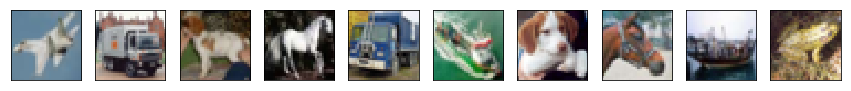

In [13]:
y_pred = model.predict_classes(x_test[10:20])
print ("Predicted scores for images: {}".format(y_pred))

n = 20  # how many digits we will display
plt.figure(figsize=(30, 8))
for i in range(10,20):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32,32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### Classification Quality

In [14]:
from sklearn import metrics
import numpy as np
from time import time
t0 = time()
y_pred = model.predict_classes(x_test)
#y_testint = np.array([np.where(r==1)[0][0] for r in  y_test])
 #Convert one-hot to index
y_testint = np.argmax(y_test, axis=1) # Brillient
target_names = [0,1,2,3,4,5,6,7,8,9]
score = metrics.accuracy_score(y_testint, y_pred)
print("accuracy test: {0:0.3f}".format(score))
print("classification report:")
print(metrics.classification_report(y_testint, y_pred))#, target_names=target_names))
print("confusion matrix: ")
print(metrics.confusion_matrix(y_testint, y_pred))

accuracy test: 0.611
classification report:
             precision    recall  f1-score   support

          0       0.72      0.65      0.68      1000
          1       0.72      0.81      0.76      1000
          2       0.41      0.70      0.51      1000
          3       0.47      0.27      0.34      1000
          4       0.55      0.51      0.53      1000
          5       0.46      0.63      0.53      1000
          6       0.82      0.52      0.64      1000
          7       0.79      0.60      0.68      1000
          8       0.70      0.80      0.75      1000
          9       0.74      0.62      0.68      1000

avg / total       0.64      0.61      0.61     10000

confusion matrix: 
[[654  33 105  12  18  14   2   7 113  42]
 [ 24 807  12  11   9   5   3   2  56  71]
 [ 47   9 698  35  69  83  24  14  13   8]
 [ 34  21 222 267  53 289  39  27  29  19]
 [ 13  10 238  35 505  96  26  53  20   4]
 [ 13   6 156  94  41 629  12  34  11   4]
 [  8  15 146  79 100  92 521   7  16  1

#### Visualizing Activations

In [15]:
from keras.models import load_model
model_cnn = load_model("CNN_Mnist.h5")

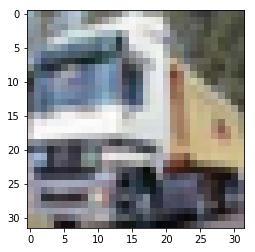

In [21]:
from read_activations import get_activations, display_activations
import matplotlib.pyplot as plt
x_valid = x_train[:5]
pixels = x_valid[1].reshape((32,32,3))
plt.imshow(pixels, cmap='gray')
plt.show()
plt.close()
#plt.imshow(x_valid[1], interpolation='nearest', cmap='jet')
#nice_imshow(pl.gca(), np.squeeze(x_valid[1:2]), vmin=0, vmax=1, cmap=cm.binary)
#convolutions_2 = convout2_f.predict(x_valid[2:2])

----- activations -----
(1, 32, 32, 6)
(1, 16, 16, 6)
(1, 16, 16, 32)
(1, 8, 8, 32)
(1, 8, 8, 80)
(1, 4, 4, 80)
(1, 4, 4, 120)
(1, 2, 2, 120)
(1, 480)
(1, 32)
(1, 10)
Displaying activation map 0


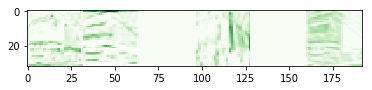

Displaying activation map 1


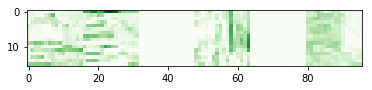

Displaying activation map 2


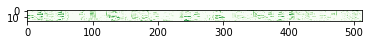

Displaying activation map 3


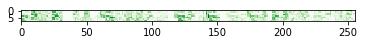

Displaying activation map 4


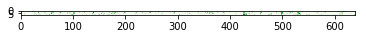

Displaying activation map 5


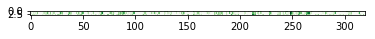

Displaying activation map 6


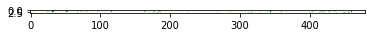

Displaying activation map 7


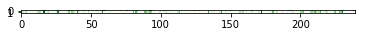

Displaying activation map 8


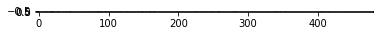

Displaying activation map 9


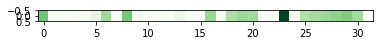

Displaying activation map 10


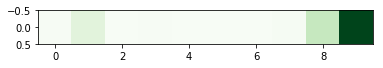

In [22]:
#a = get_activations(model_cnn, x_valid[2:3], print_shape_only=True, layer_name="conv2d_1")
a = get_activations(model_cnn, x_valid[1:2], print_shape_only=True)
display_activations(a)

In [19]:
model_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 6)         168       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        800       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 80)          10320     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 80)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 120)         38520     
__________